<a href="https://colab.research.google.com/github/shallabhkhera/NPTEL-Data-Analytics-with-Python/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
from scipy import stats
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


tbl_icecream = 'https://github.com/shallabhkhera/NPTEL-Data-Analytics-with-Python/blob/main/lrm.xlsx?raw=true'
tbl_icecream = pd.read_excel(tbl_icecream)
print(tbl_icecream)

   Restaurant  Student_Population  Sales
0           1                   2     58
1           2                   6    105
2           3                   8     88
3           4                   8    118
4           5                  12    117
5           6                  16    137
6           7                  20    157
7           8                  20    169
8           9                  22    149
9          10                  26    202


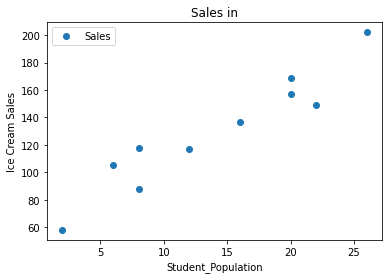

In [76]:
tbl_icecream.plot('Student_Population', 'Sales', style='o')
plt.ylabel('Ice Cream Sales')
plt.title('Sales in')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           2.55e-05
Time:                        01:55:06   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9

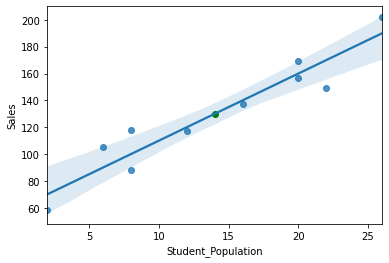

In [77]:
t = tbl_icecream['Student_Population']
c = tbl_icecream['Sales']
plt.figure()
sns.regplot(t,c,fit_reg = True)
plt.scatter(np.mean(t), np.mean(c), color="green")

import statsmodels.api as s
t = s.add_constant(t)
model1 = s.OLS(c, t)
result1 = model1.fit()
print(result1.summary())

In [78]:
from sklearn.linear_model import LinearRegression
x = tbl_icecream['Student_Population'].values.reshape(-1,1)
y = tbl_icecream['Sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(x,y)

reg.intercept_[0], reg.coef_[0][0]

(60.0, 5.0)

In [79]:
from statsmodels.stats.outliers_influence import summary_table

st, data1, ss2 = summary_table(result1, alpha=.05)
fittedvalues=data1[:,2]
predict_mean_se = data1[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data1[:, 4:6].T 
predict_ci_low, predict_ci_upp = data1[:, 6:8].T

In [80]:
predict_mean_ci_low

array([ 51.03868339,  75.2931351 ,  87.10977127,  87.10977127,
       109.56629808, 129.56629808, 147.10977127, 147.10977127,
       155.2931351 , 171.03868339])

In [81]:
predict_mean_ci_upp

array([ 88.96131661, 104.7068649 , 112.89022873, 112.89022873,
       130.43370192, 150.43370192, 172.89022873, 172.89022873,
       184.7068649 , 208.96131661])

In [82]:
predict_ci_low

array([ 32.89834155,  54.8817226 ,  65.60291394,  65.60291394,
        86.446108  , 106.446108  , 125.60291394, 125.60291394,
       134.8817226 , 152.89834155])

In [83]:
predict_ci_upp

array([107.10165845, 125.1182774 , 134.39708606, 134.39708606,
       153.553892  , 173.553892  , 194.39708606, 194.39708606,
       205.1182774 , 227.10165845])

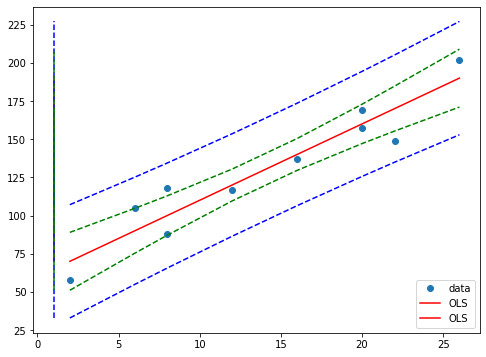

In [84]:
X = s.add_constant(x)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(X, fittedvalues, 'r-', label="OLS")
ax.plot(X, predict_ci_low, 'b--')
ax.plot(X, predict_ci_upp, 'b--')
ax.plot(X, predict_mean_ci_low, 'g--')
ax.plot(X, predict_mean_ci_upp, 'g--')
ax.legend(loc='best')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


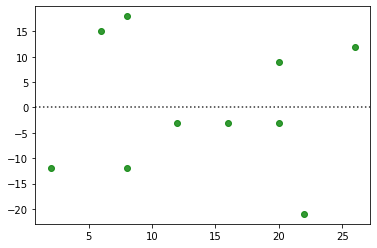

In [85]:
sns.residplot(x, y, color="g")

In [90]:

Reg1 = sm.ols(formula="Sales ~ Student_Population", data = tbl_icecream)
fit1 = Reg1.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           2.55e-05
Time:                        02:04:24   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.0000      9

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [92]:
influence = fit1.get_influence()
resid_student = influence.resid_studentized_external
resid_student

array([-1.09212653,  1.26798654, -0.94196706,  1.54023214, -0.21544891,
       -0.21544891, -0.22263461,  0.68766487, -2.01063738,  1.09212653])

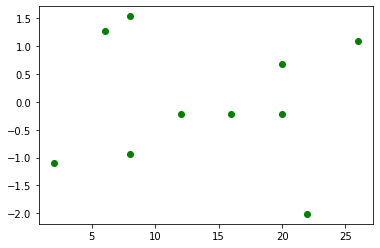

In [93]:
plt.figure()
plt.scatter(x, resid_student, color="green")

In [87]:
print (anova_lm(fit1))

                     df   sum_sq   mean_sq          F    PR(>F)
Student_Population  1.0  14200.0  14200.00  74.248366  0.000025
Residual            8.0   1530.0    191.25        NaN       NaN


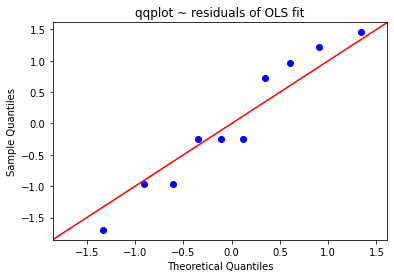

In [95]:
res = fit1.resid
probplot = s.ProbPlot(res,stats.norm, fit=True)
fig = probplot.qqplot(line='45')
h = plt.title('qqplot ~ residuals of OLS fit')
plt.show()